In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import tensorflow.keras.backend as K


In [8]:
from tensorflow.keras.datasets import cifar10, cifar100

In [9]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

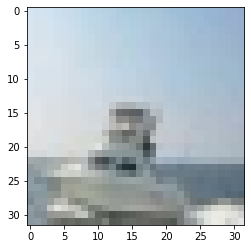

In [14]:
plt.imshow(X_train[100])

In [19]:
X_train = X_train/255.0
X_test = X_test/255.0

In [70]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.activations import softmax, relu
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential, Model  ### Model is used for functional api
from tensorflow.keras.initializers import random_normal

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, sparse_categorical_crossentropy, categorical_crossentropy
from tensorflow.keras.metrics import Accuracy, Recall, FalsePositives, FalseNegatives

In [117]:

I = Input(shape = (32,32,3))
f = Flatten()(I)
y = Dense(100, "relu")(f)
x = Dropout(0.2)(y)
x = Dense(150, "relu")(x)
x = Dropout(0.2)(x)
x = Dense(100, "relu")(x)
x += y
x = Dense(10, "softmax", kernel_initializer= random_normal(mean = 0.0, stddev = 0.0001))(x) ####the initialization is importantt!!!!!!!!!
model = Model(I, x)

In [114]:
np.mean(tf.argmax(model.predict(X_test), axis = 1).numpy() == y_test)

313/313 [==============================] - 1s 3ms/step


0.1

In [121]:
tf.math.log(2.0).numpy()  #### this a good starting loss

0.6931472

In [118]:
SparseCategoricalCrossentropy()(y_test, model.predict(X_test))

313/313 [==============================] - 1s 3ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=2.302562>

In [123]:
model.compile(optimizer = RMSprop(), loss = sparse_categorical_crossentropy, metrics = ["accuracy"])

In [124]:
model.fit(X_train, y_train,  batch_size = 64, epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
782/782 [==============================] - 13s 14ms/step - loss: 1.9447 - accuracy: 0.2848 - val_loss: 1.9666 - val_accuracy: 0.3007
Epoch 2/20
782/782 [==============================] - 8s 10ms/step - loss: 1.7640 - accuracy: 0.3616 - val_loss: 1.7417 - val_accuracy: 0.3685
Epoch 3/20
782/782 [==============================] - 8s 10ms/step - loss: 1.6979 - accuracy: 0.3917 - val_loss: 1.6924 - val_accuracy: 0.3830
Epoch 4/20
782/782 [==============================] - 10s 12ms/step - loss: 1.6601 - accuracy: 0.4047 - val_loss: 1.6576 - val_accuracy: 0.4077
Epoch 5/20
782/782 [==============================] - 9s 11ms/step - loss: 1.6279 - accuracy: 0.4165 - val_loss: 1.6236 - val_accuracy: 0.4145
Epoch 6/20
782/782 [==============================] - 10s 13ms/step - loss: 1.6108 - accuracy: 0.4240 - val_loss: 1.7289 - val_accuracy: 0.3950
Epoch 7/20
782/782 [==============================] - 9s 12ms/step - loss: 1.5917 - accuracy: 0.4303 - val_loss: 1.6087 - val_accuracy: 0.4